In [15]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr

### 3.6.1 KOSPI와 다우존스 지수 비교
- 국내 주식과 미국 주식의 상관관계 비교

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


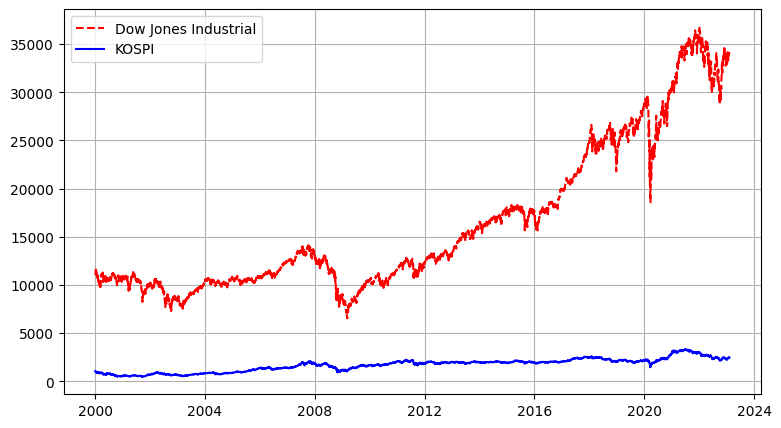

In [6]:
# KOSPI와 다우존스 지수 비교
yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5))
plt.plot(dow.index, dow.Close, 'r--', label = 'Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

- 2000년 이후의 다우존스 지수 데이터를 야후 파이낸스로부터 다운로드
- 2000년 이후의 KOSPI 데이터를 야후 파이낸스로부터 다운로드.
- 다우존스 지수를 붉은 점선으로 출력.
- KOSPI를 푸른 실선으로 출력
- 지수 기준값이 달라서, 어느 지수가 더 좋은 성과를 냈는지 한눈에 알아보기 힘들다.

### 3.6.2 지수화 비교
- 일별 종가만으로는 KOSPI와 다우존스 지수의 상관관계 비교가 힘들다.
- 이번에는 현재 종가를 특정 시점의 종가로 나누어 변동률을 구해보자.

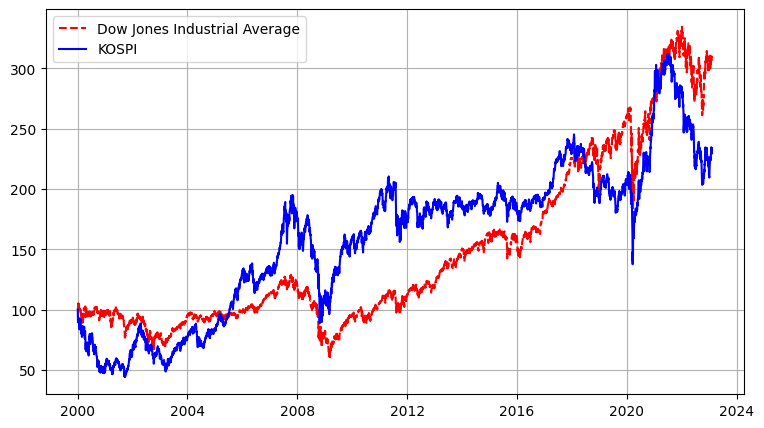

In [9]:
d = (dow.Close / dow.Close.loc['2000-01-04'])* 100 # 1) 지수화
k = (kospi.Close / kospi.Close.loc['2000-01-04'])*100 # 2) 지수화

import matplotlib.pyplot as plt
plt.figure(figsize = (9, 5))
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial Average')
plt.plot(k.index, k, 'b', label = 'KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

- 금일 다우존스 지수를 2000년 1월 4일 다우존스 지수로 나눈 뒤 100을 곱한다.
- 금일 KOSPI 지수를 2000년 1월 4일 KOSPI 지수로 나눈 뒤 100을 곱한다.
- 오늘 종가를 2000년 1월 4일 종가로 나눈 뒤 100을 곱하면, 2000년 1월 4일 종가 대비 오늘의 변동률을 구할 수 있다. -> 이를 지수화라고 한다.
- 지수화를 하고 나니, 지난 20년간 KOSPI의 상승률이 다우존스 지수의 상승률과 엇비슷했음을 확인할 수 있다.

### 3.6.3 산점도 분석
- 다우존스 지수와 KOSPI의 관계를 분석하는 데 산점도를 사용해보자.
- 산점도란 독립변수 x와 종속변수 y의 상관관계를 확인할 때 쓰는 그래프다.
- 가로축은 독립변수 x를, 세로축은 종속변수 y를 나타낸다. 미국 시장과 국내 시장의 상관관계를 알아보고자 x를 다우존스 지수로, y를 KOSPI 지수로 정했다.

- 다우존스 지수 데이터 개수와 KOSPI 지수 데이터 개수를 출력해보면 데이터 개수가 다르다. 
- 산점도를 그리려면 x, y의 사이즈가 동일해야 한다. 지금 이대로는 오류가 발생한다.

In [16]:
print(len(dow))
print(len(kospi))

# plt.scatter(dow, kospi, marker='.')

df = pd.DataFrame({'DOW':dow['Close'], 'KOSPI':kospi['Close']})
df

5809
5696


,DOW,KOSPI
Date,,
2000-01-03 15:00:00+00:00,NaN,1059.040039
2000-01-04 05:00:00+00:00,10997.929688,NaN
2000-01-04 15:00:00+00:00,NaN,986.309998
2000-01-05 05:00:00+00:00,11122.650391,NaN
2000-01-05 15:00:00+00:00,NaN,960.789978
...,...,...
2023-02-01 15:00:00+00:00,NaN,2468.879883
2023-02-02 05:00:00+00:00,34053.941406,NaN
2023-02-02 15:00:00+00:00,NaN,2480.399902


<pre>
다우존스 지수의 종가 컬럼과 KOSPI 지수의 종가 컬럼을 합쳐서 데이터프레임 df를 생성하자.</br>
한쪽에 데이터가 없으면 값이 없다는 의미의 NaN으로 자동적으로 채워주기 때문에 전체 데이터 개수가 둘다 5101개로 늘었다.</br>
그런데 아직도 산점도를 출력하면 NaN을 포함하고 있어 에러 메시지가 출력된다. 산점도를 출력하려면 NaN을 제거해야 한다.



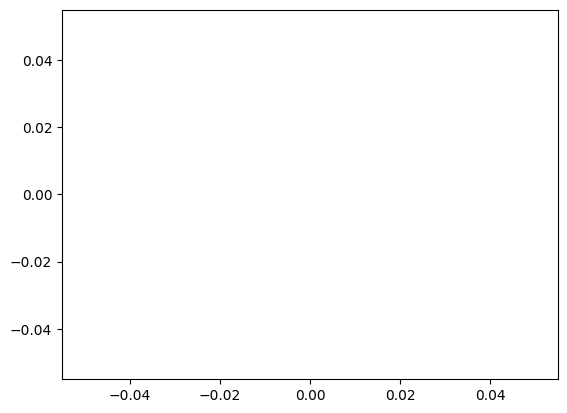

In [17]:
plt.scatter(df['DOW'], df['KOSPI'], marker = '.')

- 데이터프레임의 fillna() 함수를 사용하여 NaN을 채울 수 있는데, 인수로 bfill(backward fill)을 주면 NaN뒤에 있는 값으로 NaN을 덮어쓴다.

In [18]:
df = df.fillna(method='bfill')
df

,DOW,KOSPI
Date,,
2000-01-03 15:00:00+00:00,10997.929688,1059.040039
2000-01-04 05:00:00+00:00,10997.929688,986.309998
2000-01-04 15:00:00+00:00,11122.650391,986.309998
2000-01-05 05:00:00+00:00,11122.650391,960.789978
2000-01-05 15:00:00+00:00,11253.259766,960.789978
...,...,...
2023-02-01 15:00:00+00:00,34053.941406,2468.879883
2023-02-02 05:00:00+00:00,34053.941406,2480.399902
2023-02-02 15:00:00+00:00,33926.011719,2480.399902


- 공교롭게도 데이터프레임의 마지막 행에 NaN이 있으면 bfill 방식으로는 모든 NaN을 없앨 수 없다. 
- 그럴 때에는 ffill(forward fill)방식으로 fillna() 함수를 한 번 더 호출함으로써 제일 마지막 행의 이전 행에 있던 값으로 NaN을 덮어 쓸 수 있다.
- dropna() 함수를 사용해 NaN이 있는 행을 한 번에 모두 제거하는 방법도 있다. 하지만 fillna() 함수를 사용했을 때보다 표본 데이터 수가 적어지므로 상황에 맞게 적절히 선택해서 사용하자


In [19]:
df = df.fillna(method = 'ffill')
df

,DOW,KOSPI
Date,,
2000-01-03 15:00:00+00:00,10997.929688,1059.040039
2000-01-04 05:00:00+00:00,10997.929688,986.309998
2000-01-04 15:00:00+00:00,11122.650391,986.309998
2000-01-05 05:00:00+00:00,11122.650391,960.789978
2000-01-05 15:00:00+00:00,11253.259766,960.789978
...,...,...
2023-02-01 15:00:00+00:00,34053.941406,2468.879883
2023-02-02 05:00:00+00:00,34053.941406,2480.399902
2023-02-02 15:00:00+00:00,33926.011719,2480.399902


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


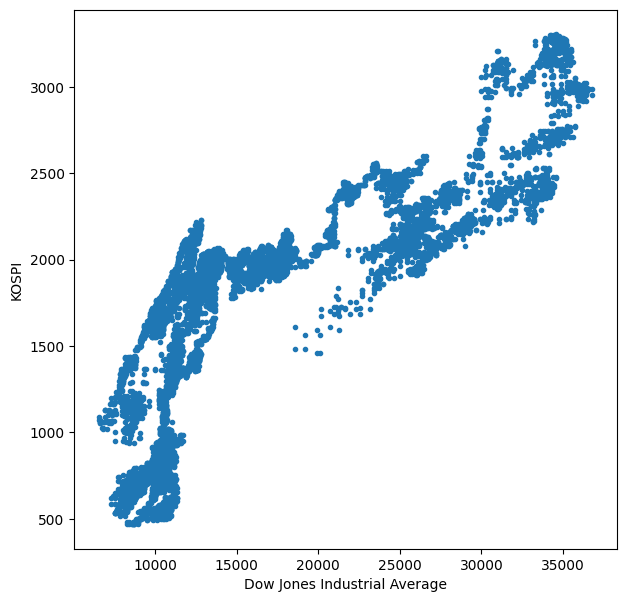

In [3]:
# 다우존스 지수와 KOSPI 산점도 분석
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'DOW': dow['Close'], 'KOSPI': kospi['Close']})
df = df.fillna(method = 'bfill')
df = df.fillna(method = 'ffill')

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

점의 분포가 y=x인 직선 형태에 가까울수록 직접적인 관계가 있다고 볼 수 있는데, 다우존스 지수와 KOSPI 지수는 어느정도 영향을 미치긴 하지만
그리 강하지는 않다.

### 3.6.4 사이파이 선형 회귀 분석
- 사이파이는 파이썬 기반 수학, 과학, 엔지니어링용 핵심 패지키 모음이다.
- 사이파이는 넘파이 기반의 함수들과 수학적 알고리즘의 모음으로 넘파이, 맷플롯립, 심파이, 팬더스 등을 포함한다.

### 3.6.5 선형 회귀 분석
- 회귀 모델이란 연속적인 데이터 Y와 이 Y의 원인이 되는 X 간의 관계를 추정하는 관계식을 의미한다.
- 실제로 데이터 값에는 측정 상의 한계로 인한 잡음이 존재하기 때문에 정확한 관계식을 표현하는 확률 변수인 오차항을 두게 된다.
- 사이파이 패키지의 서브 패키지인 스탯츠는 다양한 통계 함수를 제공한다.
- lineargress() 함수를 이용하면 시리즈 객체 두 개 만으로 간단히 선형 회귀 모델을 생성하여 분석할 수 있다.

In [4]:
from scipy import stats
regr = stats.linregress(df['DOW'], df['KOSPI'])
regr

LinregressResult(slope=0.07086374621862698, intercept=535.7011045613242, rvalue=0.8216768636283115, pvalue=0.0, stderr=0.0004583075455449804, intercept_stderr=8.291340621959717)

stats애서 생성한 모델을 이용하면 선형 회귀식을 구할 수 있다. 기울기(slope)가 약 0.09이고 y절편(intercept)이 약 310.19이므로, Y의 기대치 E(Y) = 310.19 + 0.09x로 나타낼 수 있다.

## 3.7 상관계수에 따른 리스크 완화
- 상관계수란 독립변수와 종속변수 사이의 상관관계의 정도를 나타내는 수치다.
- 상관계수 r은 항상 -1<=r<=1을 만족시킨다.


### 3.7.1 데이터프레임으로 상관계수 구하기
- corr() 함수를 제공하기 때문에 데이터프레임의 각 컬럼간의 상관계수를 쉽게 구할 수 있다.

In [5]:
df.corr()

,DOW,KOSPI
DOW,1.000000,0.821677
KOSPI,0.821677,1.000000


### 3.7.2 시리즈로 상관계수 구하기
- 시리즈도 상관계수를 구하는 corr() 함수를 제공한다. corr() 함수의 인수로 상관계수를 구할 다른 시리즈 객체를 넣어준다.

In [6]:
df['DOW'].corr(df['KOSPI'])

0.8216768636283114

### 3.7.3 결정계수 구하기
- 결정계수(R-squared)는 관측된 데이터에서 추정한 회귀선이 실제로 데이터를 어느 정도 설명하는지를 나타내는 계수로, 두 변수의 상관관계 정도를 나타내는 상관계수를 제곱한 값이다.
- 상관계수는 시리즈나 데이터프레임에서 corr() 함수를 호출해서 구해도 되고, 스탯츠 패키지를 이용하여 선형회귀 모델을 생성해서 구해도 된다.
- 데이터프레임의 corr() 함수의 결과는 테이블 형태이므로, 여기서는 제일 간편한 방식인 시리즈의 corr() 함수를 사용해 상관계수를 구하겠다.

In [7]:
r_value = df['DOW'].corr(df['KOSPI'])
r_value

0.8216768636283114

In [8]:
# 결정계수는 상관계수를 제곱해 구한다.
r_squared = r_value ** 2 # pow(r_value, 2)와 같다.
r_squared

# 결정계수가 1이면 모든 표본 관측치가 추정된 회귀선 상에만 있다는 의미다.
# 즉, 추정된 회귀선이 변수 간의 관계를 완벽히 설명한다.
# 반면에 결정계수가 0이면 추정된 회귀선이 변수 사이의 관계를 전혀 설명하지 못한다는 의미다.


0.6751528682220587

### 3.7.4 다우존스 지수와 KOSPI의 회귀 분석
- 이번에는 스탯츠 모델의 lineargress() 함수를 이용하여 선형회귀 모델을 생성한 뒤 회귀선을 그려서 분석해볼 것이다.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


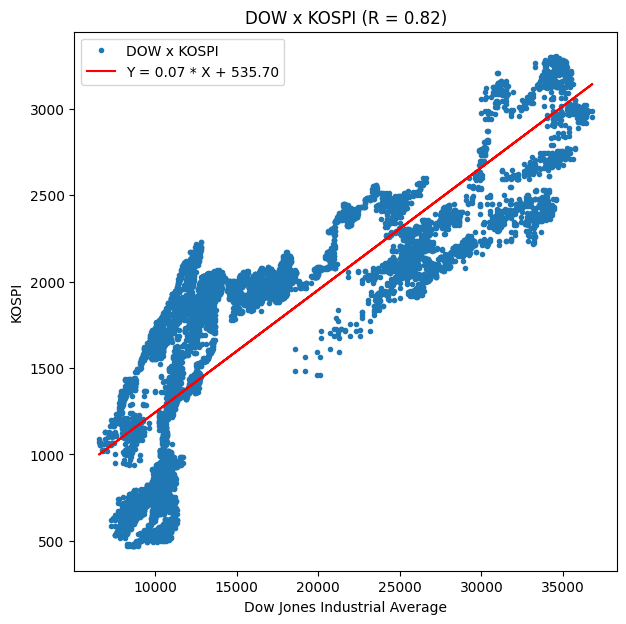

In [9]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pylab as plt

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'X': dow['Close'], 'Y': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(7,7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X +regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

1) 다우존스 지수를 야후 파이낸스로부터 다운로드 받는다.
2) 다우존스 지수를 X컬럼으로 KOSPI 지수를 Y 컬럼으로 갖는 데이터프레임을 생성한다.
3) NaN을 제거한다.
4) 다우존스 지수 X와 KOSPI 지수 Y로 선형회귀 모델 객체 regr을 생성한다.
5) 범례에 회귀식을 표시하는 레이블 문자다.
6) 산점도를 작은 원으로 나타낸다.
7) 회귀선을 붉은 색으로 그린다.

### 3.7.5 상관계수에 따른 리스크 완화
- 노벨경제학상을 수상한 해리 마코위치 박사가 체계화한 현대 포트폴리오 이론은 '투자에 대한 수익과 위험은 평균과 분산으로 나타낼 수 있으며, 상관관계가 낮은 자산을 대상으로 분산 투자하면 위험을 감소시킬 수 있다'는 이론이다.
- 상관관계가 낮은 대표적인 예로 주식과 채권을 들 수 있는데, 이처럼 상관관계가 낮은 자산들로 포트폴리오를 구성하면 약세장과 강세장에서 모두 실적을 낼 수 있다.

- 상관계수 ---------------------------------- 리스크 완화 효과
- +1.0 ------------------------------------- 리스크 완화 효과가 없음
- +0.5 ------------------------------------- 중간 정도의 리스크 완화 효과가 있음
- 0 ---------------------------------------- 상당한 리스크 완화 효과가 있음
- -0.5 ------------------------------------- 대부분의 리스크를 제거함
- -1.0 ------------------------------------- 모든 리스크 제거함